<a href="https://colab.research.google.com/github/silvi3110/sis-252-inteligencia-artificial/blob/main/OpenCV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Notebok 2 operaciones basicas con imagenes
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow #Importaciones funcion para mostrar imagenes en colab

In [2]:
#cargar imagen de ejmeplo
from urllib.request import urlopen

In [3]:
#url de la imagen de ejemplo'
url = 'https://raw.githubusercontent.com/opencv/opencv/4.x/samples/data/lena.jpg' # Updated URL
#abrimos url'
resp = urlopen(url)
# Convertimos los bytes a un array de numpy
image = np.asarray(bytearray(resp.read()), dtype="uint8")
# Convertimos el array a una imagen
image = cv2.imdecode(image, cv2.IMREAD_COLOR)
#opencv carga las imagenes en formato BGR lo convertimos a RGB para viusaliza cion correcta
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [4]:
#1 recortamo una imagen
#Definimos las coordenadas del recorte [y_inicio : y_fin , x_inicio: x_fin]
x , y , _ = image.shape
start_x , start_y = int(x*0.25) , int(y*0.25)#punto de inicio  25% de dimension
end_x , end_y = int(x*0.8) , int(y*0.8)
cropped_image = image_rgb[start_y:end_y, start_x:end_x]

In [5]:
#2 redimensionar una imagen
#definimos nuevas dimensiones (ancho y alto)
new_width , new_heigth = 200, 200 #nuevas dimensiones para redimensionar
resized_image = cv2.resize(image_rgb, (new_width, new_heigth))

In [6]:
#3 rotar una imagen
heigth , width = image_rgb.shape[:2]
#DEfinimos  el centtro de la imagen
center = (width // 2 , heigth //2)
#Definimos la matriz de rotacion (centro , angulo, escala)
roration_matrix = cv2.getRotationMatrix2D(center, 45, 1)# Rotacion de 45 grados
#Aplicamos la transformacion afin pa rotar im]magen
rotated_image = cv2.warpAffine(image_rgb, roration_matrix, (width, heigth))

In [7]:
#4 Voltear Imagen
#Volteaamos horizontalmente  (1=horizontal, 0= vertical, -1=ambos)
flipped_h = cv2.flip(image_rgb, 1)
#Volteaamos verticalmente
flipped_v = cv2.flip(image_rgb, 0)
#Volteaamos ambos
#flipped_hv = cv2.flip(image_rgb, -1)

(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

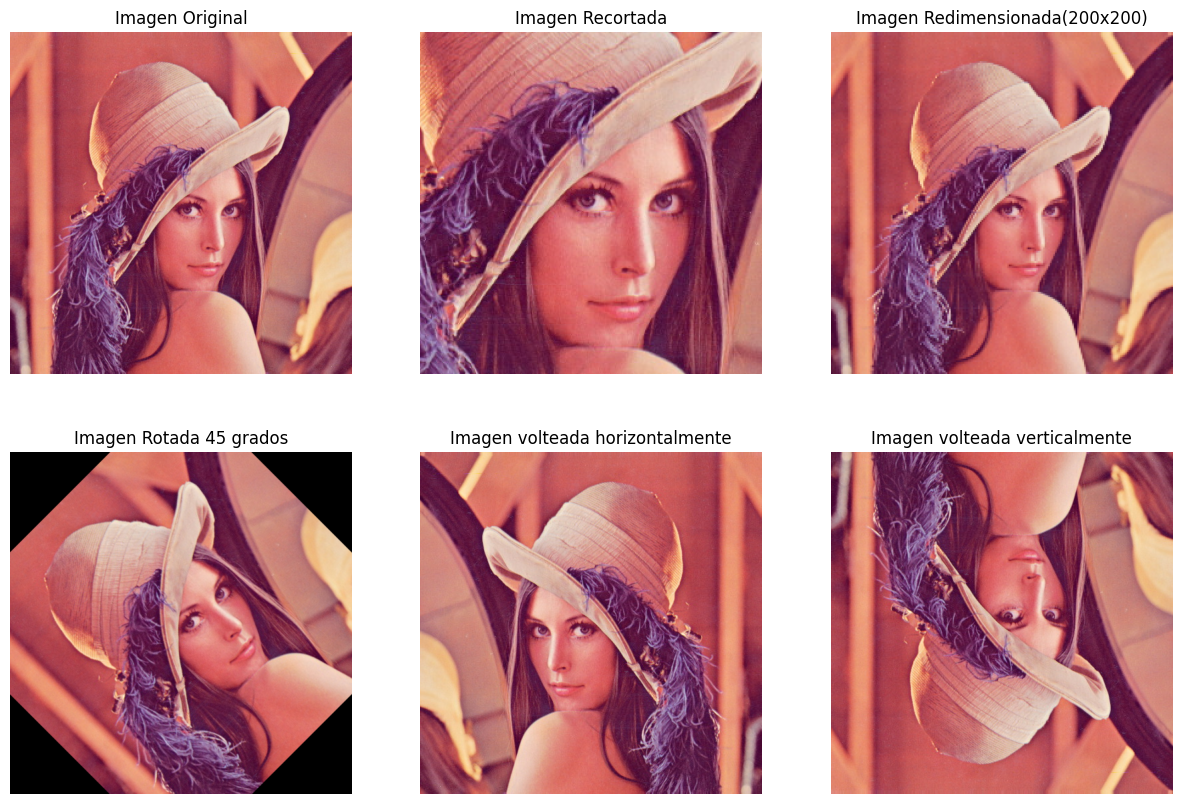

In [8]:
#visualizacion de todas las operaciones
plt.figure(figsize=(15,10)) #crear figura con tam especifico
#Imagen original
plt.subplot(2,3,1)#crear subplot en la posicion 1
plt.title("Imagen Original")
plt.imshow(image_rgb)
plt.axis("off")#ocultar ejes
#imagen cortada
plt.subplot(2,3,2) #crear subplot en la posicion 2
plt.title("Imagen Recortada")
plt.imshow(image_rgb[start_y:end_y, start_x:end_x])
plt.axis("off")

#Imagen redimensionada
plt.subplot(2,3,3) #crear subplot en la posicion 3
plt.title(f'Imagen Redimensionada({new_width}x{new_heigth})') #titulo
plt.imshow(resized_image) #mostrar imagen
plt.axis("off") #ocultar ejes

#Imagen rotada
plt.subplot(2,3,4)
plt.title("Imagen Rotada 45 grados")
plt.imshow(rotated_image)
plt.axis("off")

#imagen volteada horizontalmente
plt.subplot(2,3,5)
plt.title("Imagen volteada horizontalmente")
plt.imshow(flipped_h)
plt.axis("off")

#imagen volteada verticamente
plt.subplot(2,3,6)
plt.title("Imagen volteada verticalmente")
plt.imshow(flipped_v)
plt.axis("off")

In [9]:
#Imprimimos info de las imagenes
print(f'dimensiones de la imagenoriginal : {image_rgb.shape}')
print(f'dimensiones de la recortada : {cropped_image.shape}')
print(f'dimensiones de la redimensionada : {resized_image.shape}')

dimensiones de la imagenoriginal : (512, 512, 3)
dimensiones de la recortada : (281, 281, 3)
dimensiones de la redimensionada : (200, 200, 3)
